In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [28]:
%%writefile content.json
{
  "intents": [
    {
      "tag": "greeting",
      "input": [
        "Hi",
        "Hey",
        "How are you",
        "Is anyone there?",
        "Hello",
        "Good day",
        "greeting"
      ],
      "responses": [
        "Hey :-)",
        "Hello, thanks for visiting",
        "Hi there, what can I do for you?",
        "Hi there, how can I help?"
      ]
    },
    {
      "tag": "goodbye",
      "input": ["Bye", "See you later", "Goodbye"],
      "responses": [
        "See you later, thanks for visiting",
        "Have a nice day",
        "Bye! Come back again soon."
      ]
    },
    {
      "tag": "thanks",
      "input": ["Thanks", "Thank you", "That's helpful", "Thank's a lot!"],
      "responses": ["Happy to help!", "Any time!", "My pleasure"]
    },
    {
      "tag": "funny",
      "input": [
        "Tell me a joke!",
        "Tell me something funny!",
        "Do you know a joke?"
      ],
      "responses": [
        "Why did the hipster burn his mouth? He drank the coffee before it was cool.",
        "What did the buffalo say when his son left for college? Bison."
      ]
    },
    {
      "tag": "Fee",
      "input":  [
       "What is the fees?",
       "How much is the fees?",
       "How much is the average fee?",
       "Fees"
      ],
     "responses":[
       "The average fees is around 40K to 100K",
       "Contact us for more information @ 044-43923145"
       ]
    },
    {
      "tag":"ranking",
      "input":[
        "What is the ranking of this college?",
        "Ranking of college?",
        "which rank is this college in India?"
      ],
      "responses":[
        "NAAC - A++, 1st private university in India, Ranked 35th under university category by NIRF"
      ]
    },
    {
      "tag":"deemed",
      "input":[
        "Is the university deemed or affiliated?",
        "Is it deemed?",
        "Is it affiliated?"
      ],
      "responses":[
        "SRM is a deemed university!"
      ]
    },
    {
      "tag":"certified",
      "input":[
        "Is SRM college is certified?",
        "Is this a certified college?",
        "Certified?"
      ],
      "responses":[
        "SRM is approved by The University Grants Commission(UGC), SRM is accredited by NAAC 'A++' Grade in the Year 2018, SRM is ranked under the Diamond category by IGAUGE, Ministry of HRD places SRM IST in category A, SRM ranked 2nd in the ARIIA rankings for Self Financed Institutions, Ranked 19th under University Category by NIRF in 2022."
      ]
    },
    {
      "tag":"phone",
      "input":[
        "Are phone allowed inside the campus?"
      ],
      "responses":[
        "Yes you can carry it inside the campus."
      ]
    },
    {
      "tag":"transportation",
      "input":[
        "how much do SRM charge for transportation(Bus)?",
        "Bus fees?",
        "transport options?",
        "transport?"
      ],
      "responses":[
        "Bus fee: Rs30K (within 5km) and Rs35K (more than 5km) "
      ]
    },
    {
      "tag":"Payment mode",
      "input":[
        "Payment mode?",
        "Online or Offline mode of payment?",
        "pay fees?",
        "how to pay fees?"
      ],
      "responses":[
        "Both online and offline mode of payment is available."
      ]
    },
    {
      "tag":"Placement",
      "input":[
        "About placements?",
        "Placements?",
        "Is SRM ramapuram good for placements?"
      ],
      "responses":[
        " 100% Placement Record for the past 6 Academic years. An average of 200+ companies visiting every year."
      ]
    }
  ]
}

Overwriting content.json


In [29]:
with open('content.json') as content:
     data1=json.load(content)

In [30]:
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [31]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [32]:
data

,inputs,tags
0,Hi,greeting
1,Hey,greeting
2,How are you,greeting
3,Is anyone there?,greeting
4,Hello,greeting
5,Good day,greeting
6,greeting,greeting
7,Bye,goodbye
8,See you later,goodbye
9,Goodbye,goodbye


In [33]:
data = data.sample(frac=1)

In [34]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
40,placements,Placement
2,how are you,greeting
34,transport,transportation
29,certified,certified
23,which rank is this college in india,ranking
12,thats helpful,thanks
14,tell me a joke,funny
22,ranking of college,ranking
10,thanks,thanks
36,online or offline mode of payment,Payment mode


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [36]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [37]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  69
output length :  12


In [38]:
i = Input(shape=(input_shape))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation='softmax')(x)
model = Model(i,x) 

In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 3s 11ms/step - loss: 2.4867 - accuracy: 0.0238
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 2.4840 - accuracy: 0.1190
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 2.4821 - accuracy: 0.1905
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 2.4802 - accuracy: 0.2143
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 2.4783 - accuracy: 0.1667
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 2.4762 - accuracy: 0.1667
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 2.4742 - accuracy: 0.1667
Epoch 8/200
2/2 [==============================] - 0s 13ms/step - loss: 2.4720 - accuracy: 0.1667
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 2.4699 - accuracy: 0.1667
Epoch 10/200
2/2 [==============================] - 0s 13ms/step - loss: 2.4679 - accuracy: 0.1667
Epoch 11/200
2/2 [==

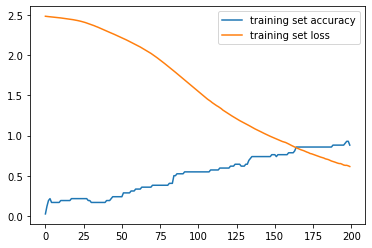

In [41]:
plt.plot(train.history['accuracy'],label ='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
import random

while True:
  texts_p = []
  prediction_input = input('You: ')

  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("Karen: ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break
